In [1]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v3.csv')
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [2]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

<IPython.core.display.Javascript object>


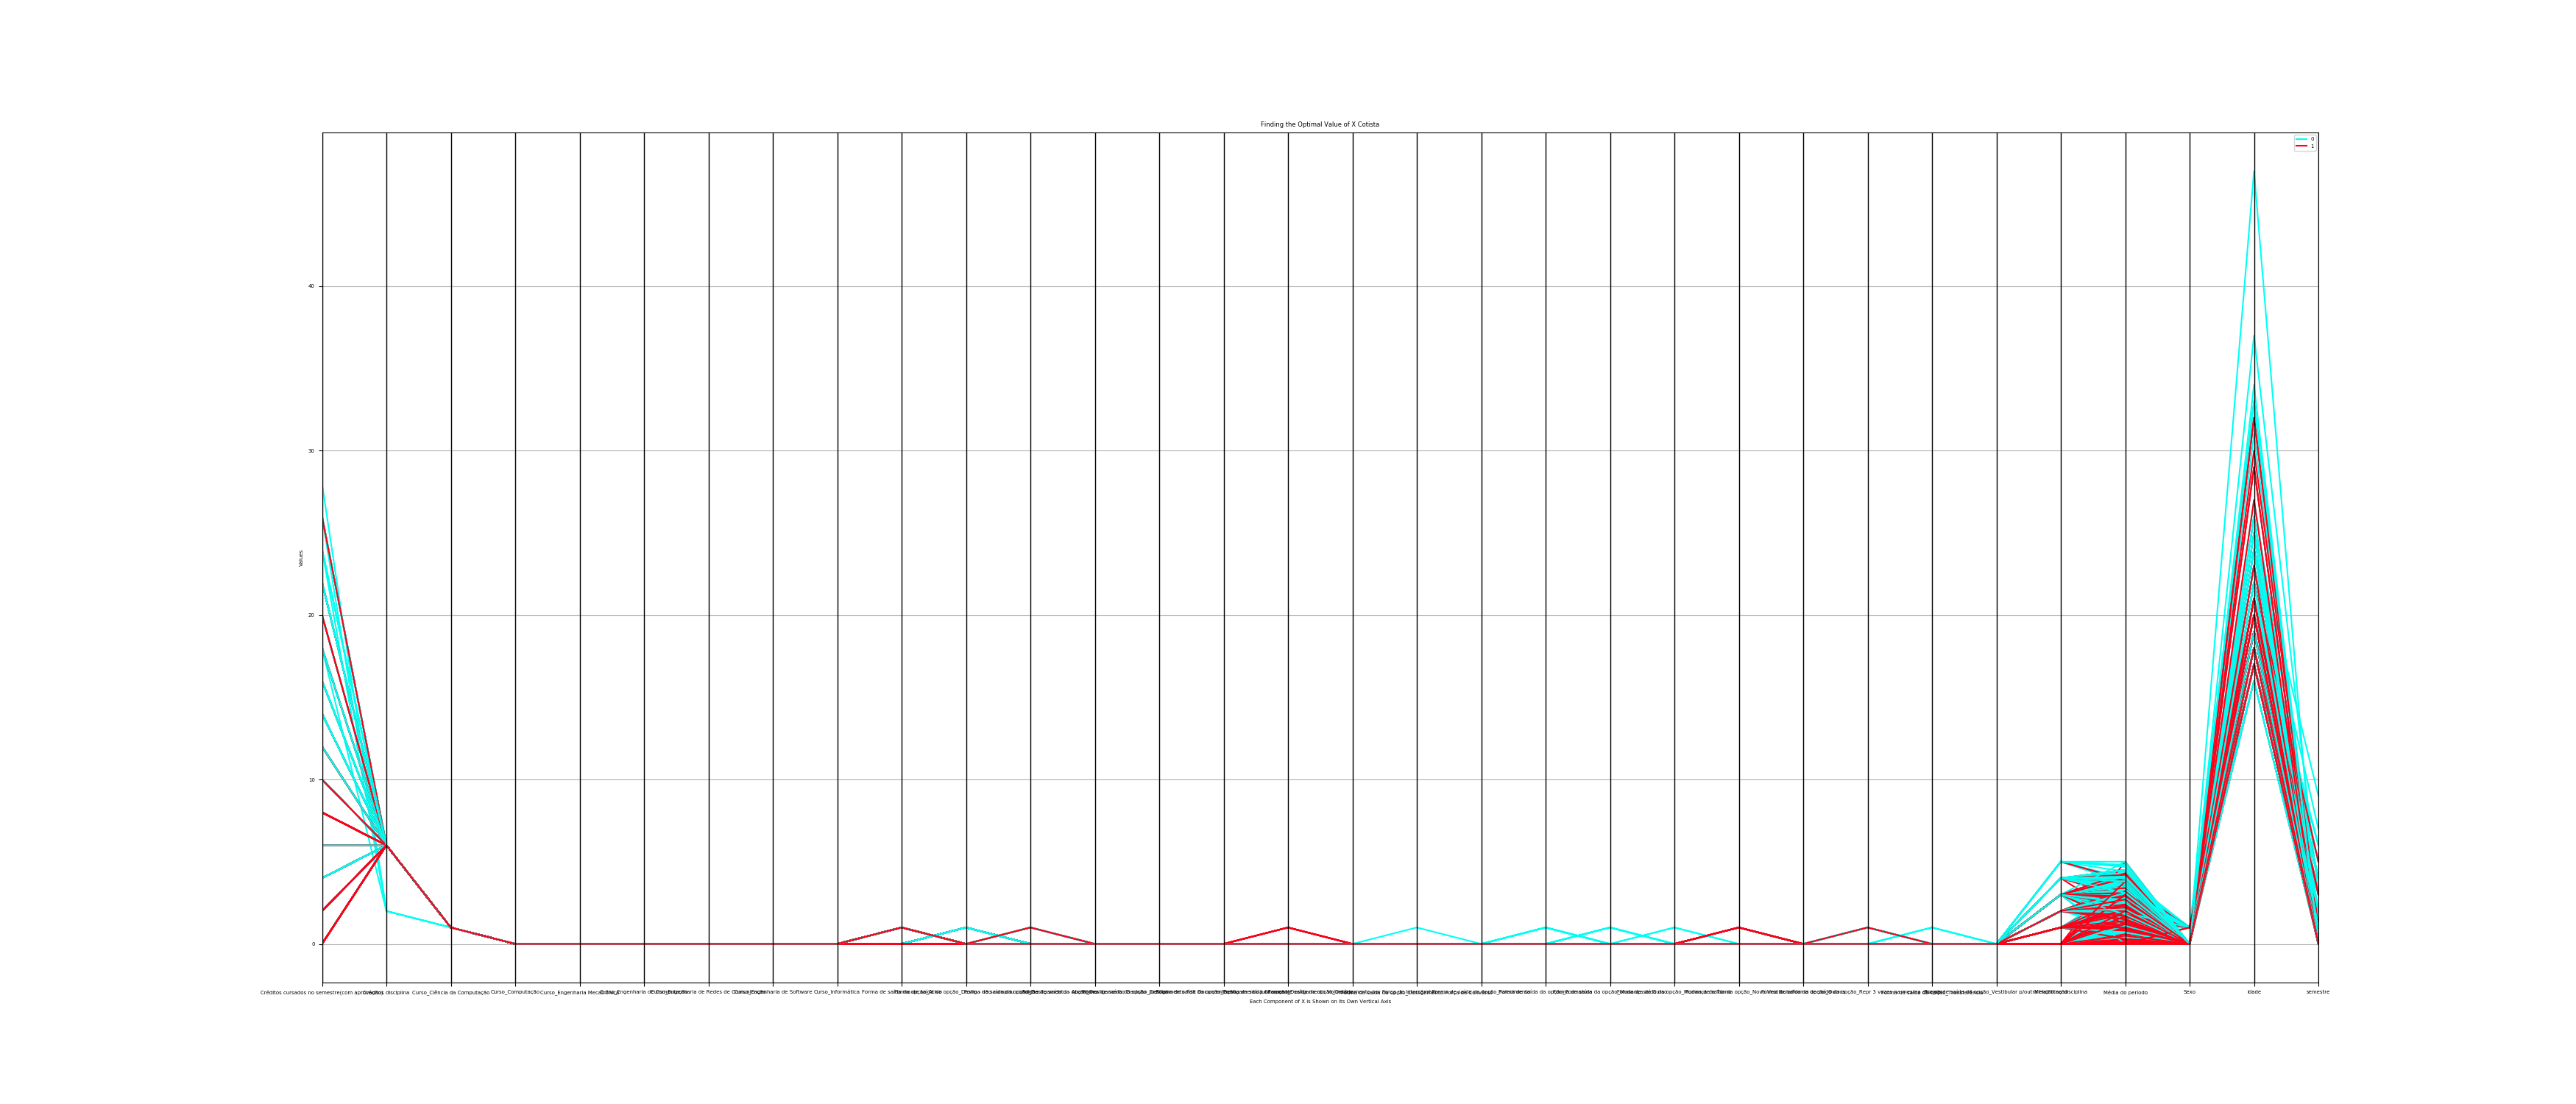

In [8]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [35, 15]
plt.rcParams.update({'font.size': 5})

# filtragem das coordenadas
df1 = df[df['Código da disciplina']==113034]
df1 = df1[df1['Curso_Ciência da Computação'] == 1]
df1 = df1[df1['Ano e Semestre'] >= 20112]

# retorna todas as colunas exceto as especificadas no array
data2 = df1[df1.columns.difference(['Data de Nascimento', 'Período de Ingresso na Unb', 
                                    'Período de saída da opção', 'Ano e Semestre', 'Créditos cursados no total', 
                                    'Código da disciplina', 'ID Aluno', 'Unnamed: 0'])]

#currentLabel = 'Menção na disciplina'
#currentLabel = 'Sexo'
currentLabel = 'Cotista'
numColors = len(data2[currentLabel].unique())
cmap = get_cmap(numColors+1)
colorList = [cmap(i) for i in range(1, numColors+1)]

parallel_coordinates(data2, currentLabel, color=colorList)
plt.xlabel("Each Component of X is Shown on its Own Vertical Axis")
plt.ylabel("Values")
plt.title(f"Finding the Optimal Value of X {currentLabel}")
plt.show()
